# Exercise Description
## Linear regression with one variable

- In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.
- The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

In [1]:
import numpy as np
import pandas as pd
import sklearn
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

## 1. Extract Data from Github

In [2]:
# Load data from github
# Remember to copy the link in the raw mode
url = 'https://raw.githubusercontent.com/SiyuYang-1919/Coursera-ML-AndrewNg-Notes/master/code/ex1-linear%20regression/ex1data1.txt'
data = pd.read_csv(url, delimiter=',', header=None)

Reference: https://stackoverflow.com/questions/32400867/pandas-read-csv-from-url

In [3]:
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.columns

Int64Index([0, 1], dtype='int64')

In [5]:
pp = data.rename(columns={0:'Population(10k)', 1: 'Profit($ 10k)'})

## 2. Plotting the Data

Text(0.5, 1.0, 'Population and Profit')

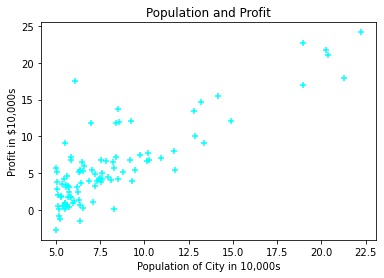

In [6]:
fig, ax = plt.subplots()
ax.scatter(x=pp['Population(10k)'], y=pp['Profit($ 10k)'], c='cyan', marker='+')
ax.set_xlabel('Population of City in 10,000s')
ax.set_ylabel('Profit in $10,000s')
ax.set_title('Population and Profit')

## 3. Gradient Descent

### 3.1 Preparation for the Data

In [7]:
# Add a column of ones to the dataset
pp.insert(0, 'Ones', 1)

In [8]:
# Initialize fitting parameters
theta = np.array([[0,0]])
iterations = 1500
alpha = 0.01

In [9]:
theta.shape

(1, 2)

### 3.2 Compute the cost function

In [10]:
# Define a cost function for the linear regrssion with one variable
def CostFunction(m, theta, X, y):
    j = sum((X.dot(np.transpose(theta)) - y)**2) / (2*m)
    return j

In [11]:
X = np.array(pp.drop(['Profit($ 10k)'], axis=1))
y = np.array(pd.DataFrame(pp['Profit($ 10k)']))
m = pp.shape[0]

In [12]:
X.shape

(97, 2)

In [13]:
y.shape

(97, 1)

In [14]:
CostFunction(m=m, theta=theta, X=X, y=y)

array([32.07273388])

### 3.3 Gradient descent

In [15]:
# Write the gradient descent function
def GradientDescent(m, theta, X, y, alpha=0.01, iterations=1500):
    # Update theta_j
    for i in range(iterations):
        differences = X.dot(theta.T) - y
        x_1 = np.array(pd.DataFrame(X[:,1]))
        theta_0 = theta[0][0] - alpha * sum(differences) / m
        theta_1 = theta[0][1] - alpha * sum(differences.T.dot(x_1)) / m
        theta = np.array([[theta_0[0], theta_1[0]]])
        # Call the cost function to check if it is decreasing
        # cost = CostFunction(m, theta, X, y)
        # print(cost)
    return theta

In [16]:
# Get the parameters
theta_new = GradientDescent(m=m, theta=theta, X=X, y=y, alpha=0.01, iterations=1500)

In [17]:
# Get the prediction results
predict1 = (np.array([[1, 3.5]])).dot(theta_new.T)
predict2 = (np.array([[1, 7]])).dot(theta_new.T)

In [18]:
print(predict1, predict2)

[[0.45197679]] [[4.53424501]]


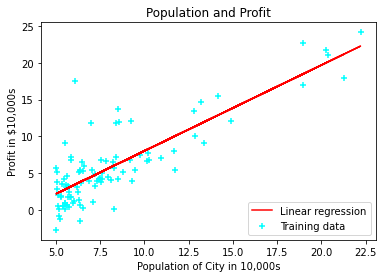

In [19]:
# Plot the linear fit with computed parameters
fig, ax = plt.subplots()
ax.scatter(x=pp['Population(10k)'], y=pp['Profit($ 10k)'], c='cyan', marker='+', label='Training data')
x = pp['Population(10k)']
y_1 = theta_new[0][0] + theta_new[0][1] * x
ax.plot(pp['Population(10k)'], y_1, 'r-', label='Linear regression')
ax.set_xlabel('Population of City in 10,000s')
ax.set_ylabel('Profit in $10,000s')
ax.set_title('Population and Profit')
ax.legend(loc='lower right')
plt.show()

## 4. Visualizing the cost function

### 4.1 Visualizing the gradient descent process

In [20]:
# Combine the cost function and gradient descent to get all the data in the minimization process
def combined(m, theta, X, y, alpha=0.01, iterations=1500):
    # Create empty lists to store the data
    theta_0_s = []
    theta_1_s = []
    costs = []
    for i in range(iterations):
        # Fill the initialized/updated values
        theta_0_s.append(theta[0][0])
        theta_1_s.append(theta[0][1])
        costs.append(CostFunction(m, theta, X, y)[0])
        # Update theta_j
        differences = X.dot(theta.T) - y
        x_1 = np.array(pd.DataFrame(X[:,1]))
        theta_0 = theta[0][0] - alpha * sum(differences) / m
        theta_1 = theta[0][1] - alpha * sum(differences.T.dot(x_1)) / m
        theta = np.array([[theta_0[0], theta_1[0]]])
    # Fill the data in a single dataframe
    d = {'theta_0': theta_0_s, 'theta_1': theta_1_s, 'cost': costs}
    cost_data = pd.DataFrame(data=d)
    return cost_data

In [21]:
costs = combined(m=m, theta=theta, X=X, y=y, alpha=0.01, iterations=1500)

In [22]:
costs.head()

,theta_0,theta_1,cost
0,0.000000,0.000000,32.072734
1,0.058391,0.653288,6.737190
2,0.062892,0.770010,5.931594
3,0.057823,0.791348,5.901155
4,0.051064,0.795730,5.895229


In [ ]:
J_vals = 

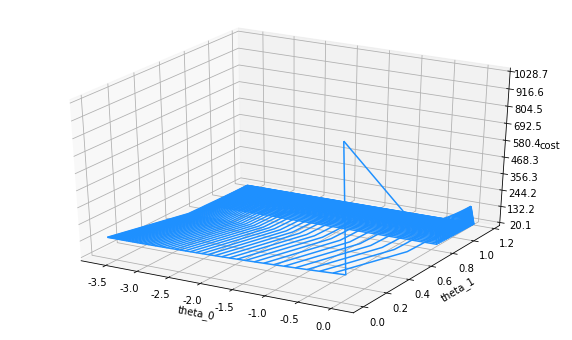

In [23]:
x = np.array(pd.DataFrame(costs['theta_0']))
y = np.array(pd.DataFrame(costs['theta_1']))
z = np.array(pd.DataFrame(costs['cost']))
X, Y = np.meshgrid(x, y)
Z = np.outer(z.T, z) 

fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')

surf = ax.plot_wireframe(X, Y, Z, color='dodgerblue')

ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel('cost')

ax.set_zlim(np.min(Z), np.max(Z))
ax.zaxis.set_major_locator(LinearLocator(10))

ax.zaxis.set_major_formatter(FormatStrFormatter('%.01f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.01f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.01f'))

# fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [25]:
Z

array([[1028.66025837,  216.08011686,  190.242422  , ...,  143.79675845,
         143.79600908,  143.79526241],
       [ 216.08011686,   45.38973536,   39.96227563, ...,   30.20591115,
          30.20575374,   30.20559689],
       [ 190.242422  ,   39.96227563,   35.18380226, ...,   26.59405122,
          26.59391263,   26.59377454],
       ...,
       [ 143.79675845,   30.20591115,   26.59405122, ...,   20.10139652,
          20.10129177,   20.10118739],
       [ 143.79600908,   30.20575374,   26.59391263, ...,   20.10129177,
          20.10118701,   20.10108264],
       [ 143.79526241,   30.20559689,   26.59377454, ...,   20.10118739,
          20.10108264,   20.10097826]])

<a list of 4 text.Text objects>

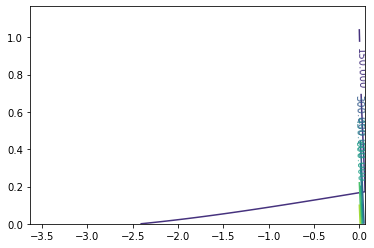

In [24]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)